In [52]:
# Alumna: Romero Jiménez Sofía Cristal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math

Demanda diaria simulada: [2, 8, 6, 7, 4, 5, 8, 2, 7, 3, 1, 3, 7, 2, 6, 3, 2, 2, 6, 5, 6, 5, 6, 7, 5, 6, 6, 8, 8, 6, 4, 5, 1, 4, 6, 5, 11, 5, 1, 2, 8, 3, 4, 7, 2, 8, 9, 5, 7, 3, 8, 10, 3, 5, 7, 4, 4, 6, 6, 5, 6, 9, 8, 3, 5, 7, 5, 2, 1, 7, 4, 5, 6, 5, 4, 0, 8, 3, 5, 6, 9, 6, 3, 7, 2, 4, 5, 1, 6, 4, 5, 4, 3, 3, 4, 10, 7, 3, 6, 8]


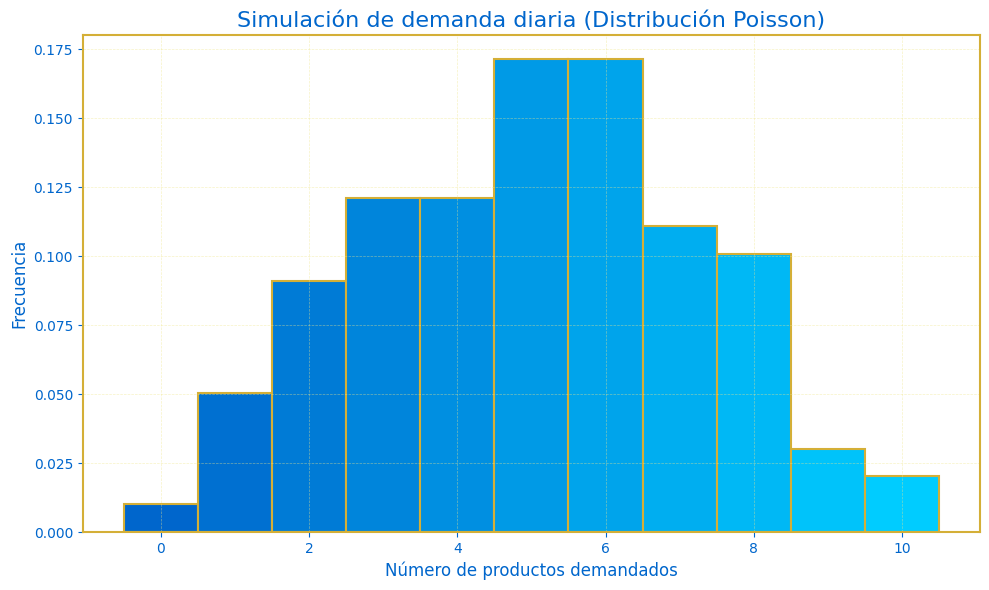

In [54]:
# Parámetro de la distribución Poisson (media de la demanda diaria)
lambda_poisson = 5  # Por ejemplo, 5 teléfonos móviles por día

# Generar una variable aleatoria uniforme U ~ Uniform(0, 1)
n = 100  # Número de simulaciones
U = np.random.uniform(0, 1, n)

# Aplicar la transformada inversa para la distribución Poisson
def poisson_inverse_transform(lambda_poisson, U):
    k = 0
    F_k = np.exp(-lambda_poisson)  # Primera probabilidad acumulada (k=0)
    while U > F_k:
        k += 1
        F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / math.factorial(k)
    return k

# Generar demanda simulada usando transformada inversa
demanda_simulada = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar los resultados
print("Demanda diaria simulada:", demanda_simulada)

# Diseño de la gráfica
plt.figure(figsize=(10, 6))

azul_claro = '#00CCFF'
azul_oscuro = '#0066CC'
dorado = '#D4AF37'

# Crear un colormap personalizado
colors = [azul_oscuro, azul_claro]
cmap = LinearSegmentedColormap.from_list("custom_blues", colors, N=100)

# Graficar histograma con colores personalizados
n, bins, patches = plt.hist(demanda_simulada,
                           bins=np.arange(0, max(demanda_simulada) + 1) - 0.5,
                           edgecolor=dorado,
                           linewidth=1.5,
                           density=True)

# Colorear las barras con degradado
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

plt.title("Simulación de demanda diaria (Distribución Poisson)", fontsize=16, color=azul_oscuro)
plt.xlabel("Número de productos demandados", fontsize=12, color=azul_oscuro)
plt.ylabel("Frecuencia", fontsize=12, color=azul_oscuro)

# Personaliza los ejes
plt.tick_params(colors=azul_oscuro)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(dorado)
    spine.set_linewidth(1.5)

plt.grid(True, linestyle='--', linewidth=0.5, color='#F0E68C', alpha=0.5)

plt.tight_layout()
plt.show()